In [90]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sp
import copy
from scipy.integrate import simps

In [109]:
plt.rcParams.update({'font.size': 12})
Hbar2m = 0.5

def give_HS(zeta, alphas):
    numComp = len(alphas)
    H_kin = np.zeros((numComp, numComp), dtype=float)
    H_pot = np.zeros((numComp, numComp), dtype=float)
    H = np.zeros((numComp, numComp), dtype=float)
    S = np.zeros((numComp, numComp), dtype=float)
    for i in range(numComp):
        S[i][i] = (np.pi/(2*alphas[i]))**1.5
        H_kin[i][i] = Hbar2m * 6 *alphas[i]**2/(2*alphas[i]) * S[i][i]
        H_pot[i][i] = -2*np.pi*zeta/(2*alphas[i])
        H[i][i] = H_kin[i][i] + H_pot[i][i]
        for j in range(i+1, numComp):
            S[i][j] = (np.pi/(alphas[i]+alphas[j]))**1.5
            H_kin[i][j] = Hbar2m * 6 *alphas[i]*alphas[j]/(alphas[i]+alphas[j]) * S[i][j]
            H_pot[i][j] = -2*np.pi*zeta/(alphas[i]+alphas[j])
            H[i][j] = H_kin[i][j] + H_pot[i][j]
            S[j][i] = S[i][j]
            H[j][i] = H[i][j]
    return S, H  

# Задание 1-2.

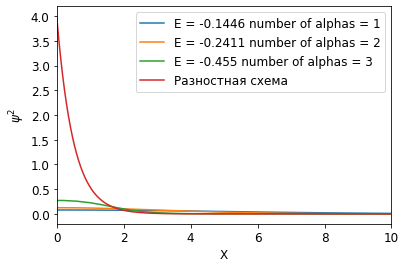

In [122]:
number_e = dict()
zeta = 1
alpha = [0.01]
S, H = give_HS(zeta, alpha)
E, Coeffs = sp.eigh(H, S)
l = 20
x = np.linspace(-l, l, 100)
psi = np.zeros(len(x))
for j in range(len(x)):
    for i in range(len(alpha)):
        psi[j] += Coeffs[i]*np.exp(-alpha[i]*x[j]**2)
plt.plot(x, np.power(psi, 2)/simps(np.power(psi, 2), x), label = 'E = ' + str(round(E[list(E).index(min(E))], 4))+' number of alphas = '+str(len(alpha)))
number_e[len(alpha)] = min(E)
alpha = [0.01, 0.03]
S, H = give_HS(zeta, alpha)
E, coeffs = sp.eigh(H, S)
Coeffs = coeffs[list(E).index(min(E))]
x = np.linspace(-l, l, 100)
psi = np.zeros(len(x))
for j in range(len(x)):
    for i in range(len(alpha)):
        psi[j] += Coeffs[i]*np.exp(-alpha[i]*x[j]**2)
plt.plot(x, np.power(psi, 2)/simps(np.power(psi, 2), x), label = 'E = ' + str(round(E[list(E).index(min(E))], 4))+' number of alphas = '+str(len(alpha)))
number_e[len(alpha)] = min(E)
alpha = [0.01, 0.2, 0.5]
S, H = give_HS(zeta, alpha)
E, coeffs = sp.eigh(H, S)
Coeffs = coeffs[list(E).index(min(E))]
x = np.linspace(-l, l, 100)
psi = np.zeros(len(x))
for j in range(len(x)):
    for i in range(len(alpha)):
        psi[j] += Coeffs[i]*np.exp(-alpha[i]*x[j]**2)
plt.plot(x, np.power(psi, 2)/simps(np.power(psi, 2), x), label = 'E = ' + str(round(E[list(E).index(min(E))], 4))+' number of alphas = '+str(len(alpha)))
number_e[len(alpha)] = min(E)
plt.xlabel('X')
plt.ylabel('$\psi^2$')
r, psy = [], []
with open('dz2_wf') as f:
    for line in f:
        r.append(float(line.split()[0]))
        psy.append(float(line.split()[1]))
plt.plot(r, np.power(psy, 2), label = 'Разностная схема')
plt.xlim(0, 10)
plt.legend()

Text(0, 0.5, 'E - $E0_{theor}$')

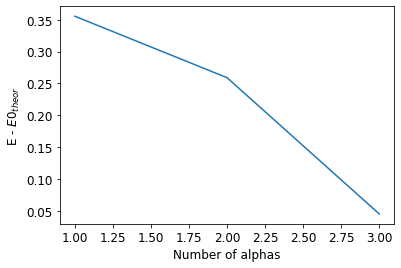

In [123]:
e = number_e.values()
e = [i+0.5 for i in e]
plt.plot(list(number_e.keys()), e)
plt.xlabel('Number of alphas')
plt.ylabel('E - $E0_{theor}$')

В зависимости от того, какие мы альфа будем брать при увеличении их числа, полученная энергия может как приблизиться к значению -0.5, так и отдалиться от него. За счет того, что система неполная, мы не можем сказать, что чем больше мы базисных функций возьмем, тем лучше сможем приблизить исходную функцию и тем самым энергию основного состояния.

При альфа =  0.28300000000000003 получаем минимум энергии =  -0.4244131771389239


Text(0, 0.5, 'E')

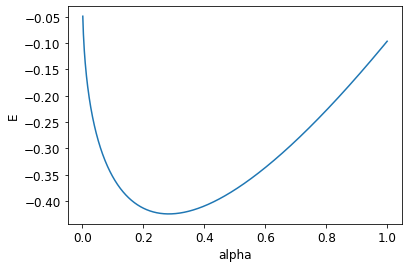

In [115]:
alpha = [[i*0.001 for j in range(1)] for i in range(1, 1000)]
zeta = 1
e, coeffs = [], []
for i in range(len(alpha)):
    S, H = give_HS(zeta, alpha[i])
    E, Coeffs = sp.eigh(H, S)
    e.append(E)
    coeffs.append(Coeffs)
print('При альфа = ', alpha[e.index(min(e))][0], 'получаем минимум энергии = ', min(e)[0])
plt.plot(alpha, e)
plt.xlabel('alpha')
plt.ylabel('E')

# Задание 3.

In [126]:
e1 = []
alpha = [0.109818, 0.405771, 2.22776]
S, H = give_HS(zeta, alpha)
E, coeffs = sp.eigh(H, S)
Coeffs = coeffs[list(E).index(min(E))]
e1.append(min(E))
alpha = [0.121949, 0.444529, 1.962079, 13.00773]
S, H = give_HS(zeta, alpha)
E, coeffs = sp.eigh(H, S)
Coeffs = coeffs[list(E).index(min(E))]
e1.append(min(E))
print('Энергия, полученная с помощью наших базисных функций(1, 2, 3):', list(number_e.values()), '\n', 'Энергия, полученная с помощью оптимизированных базисных функций:', e1)

Энергия, полученная с помощью наших базисных функций(1, 2, 3): [-0.14457691216057308, -0.24105504821941903, -0.4549641165485869] 
 Энергия, полученная с помощью оптимизированных базисных функций: [-0.49501058672230874, -0.4992784056672946]


Оптимизированный базис гораздо лучше приближает энергию основного состояния, чем произвольный. #Логично))

# Задание 4. 

In [127]:
#надо пересчитать интегралы и по новому заполнить матрицу гамильтониана
def give_HS1(zeta, alphas):
    numComp = len(alphas)
    H_kin = np.zeros((numComp, numComp), dtype=float)
    H_pot = np.zeros((numComp, numComp), dtype=float)
    H = np.zeros((numComp, numComp), dtype=float)
    S = np.zeros((numComp, numComp), dtype=float)
    for i in range(numComp):
        S[i][i] = ((np.pi/(2*alphas[i]))**1.5)/2
        H_kin[i][i] = Hbar2m * 10 *alphas[i]**2/(2*alphas[i]) * S[i][i]
        H_pot[i][i] = -2*np.pi*zeta/(3*4*alphas[i]**2)
        H[i][i] = H_kin[i][i] + H_pot[i][i]
        for j in range(i+1, numComp):
            S[i][j] = ((np.pi/(alphas[i]+alphas[j]))**1.5)/2
            H_kin[i][j] = Hbar2m * 10 *alphas[i]*alphas[j]/(alphas[i]+alphas[j]) * S[i][j]
            H_pot[i][j] = -2*np.pi*zeta/(3*(alphas[i]+alphas[j])**2)
            H[i][j] = H_kin[i][j] + H_pot[i][j]
            S[j][i] = S[i][j]
            H[j][i] = H[i][j]
    return S, H  

Text(0, 0.5, 'E')

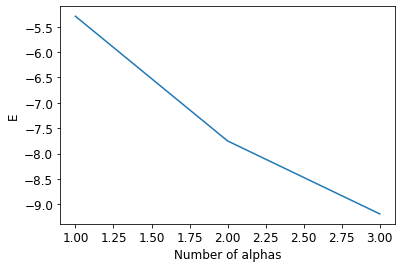

In [131]:
zeta = 1
number_e = dict()
alpha = [0.01]
S, H = give_HS1(zeta, alpha)
E, Coeffs = sp.eigh(H, S)
number_e[len(alpha)] = min(E)
alpha = [0.01, 0.02]
S, H = give_HS1(zeta, alpha)
E, Coeffs = sp.eigh(H, S)
number_e[len(alpha)] = min(E)
alpha = [0.01, 0.02, 0.03]
S, H = give_HS1(zeta, alpha)
E, Coeffs = sp.eigh(H, S)
number_e[len(alpha)] = min(E)
e = list(number_e.values())
plt.plot(list(number_e.keys()), e)
plt.xlabel('Number of alphas')
plt.ylabel('E')

Как мы можем наблюдать, полученные значения энергии для случайных значений альфа находятся очень далеко от энергии основного состояния атома водорода. А если мы совсем промахнулись с коэффициентами и поэтому так далеко по энергии? Давайте тогда оптимизируем по одному значению альфа и посмотрим на результат.

При альфа =  0.001 получаем минимум энергии =  -16.8183834801344


Text(0, 0.5, 'E')

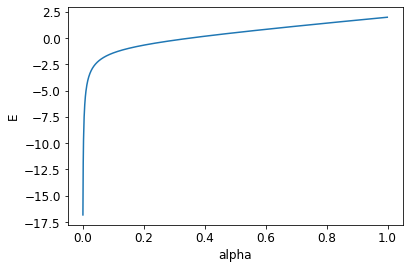

In [133]:
alpha = [[i*0.001 for j in range(1)] for i in range(1, 1000)]
zeta = 1
e, coeffs = [], []
for i in range(len(alpha)):
    S, H = give_HS1(zeta, alpha[i])
    E, Coeffs = sp.eigh(H, S)
    e.append(E)
    coeffs.append(Coeffs)
print('При альфа = ', alpha[e.index(min(e))][0], 'получаем минимум энергии = ', min(e)[0])
plt.plot(alpha, e)
plt.xlabel('alpha')
plt.ylabel('E')

Все-таки наше предположение оказалось верным. В зависимости энергии от значения альфа минимум достигается при минимальном альфа и находится очень далеко от истинного значения основной энергии. Это говорит о недопустимости использования данного базиса для описания основого состояния атома водорода. (Этого и следовало ожидать, ведь в данном базисе при r = 0, $\psi^2$ = 0, а в основном состоянии атома водорода при r = 0 мы ожидаем максимум волновой функции.)

# Задание 5.

Text(0, 0.5, 'Energy of the ground state')

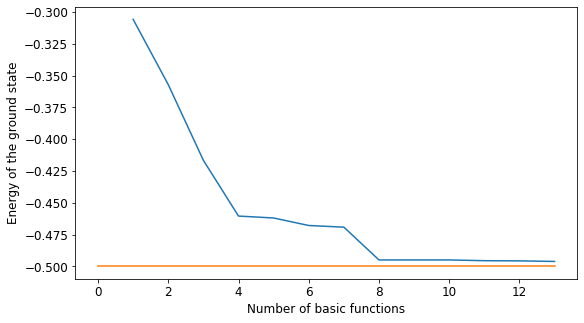

In [151]:
number_e = dict()
zeta = 1
l = 13
lyambda = np.random.uniform(0.1, 5, l)
alphas = [1/(i**2) for i in lyambda]
for j in range(1, l+1):
    alpha = alphas[:j]
    S, H = give_HS(zeta, alpha)
    E, Coeffs = sp.eigh(H, S)
    number_e[len(alpha)] = min(E)
plt.figure(figsize = (9, 5))
plt.plot(list(number_e.keys()), list(number_e.values()))
plt.plot(np.linspace(0, 13, 100), [-0.5]*100)
plt.xlabel('Number of basic functions')
plt.ylabel('Energy of the ground state')

При случайном задании альфа, энергия основного состояния может как сходиться к -0.5 при увеличении количества базисных функций, так и нет. Как я ранее упоминала результат очень сильно зависит от самих альфа, в следствие неполноты системы базисным функций. 

# Задание 6.

Можно получить ответ двумя способами. Первый вывести из теории.  Второй-посчитать альфа для разных зарядов и посмотреть зависимость. Я представлю оба способа. 

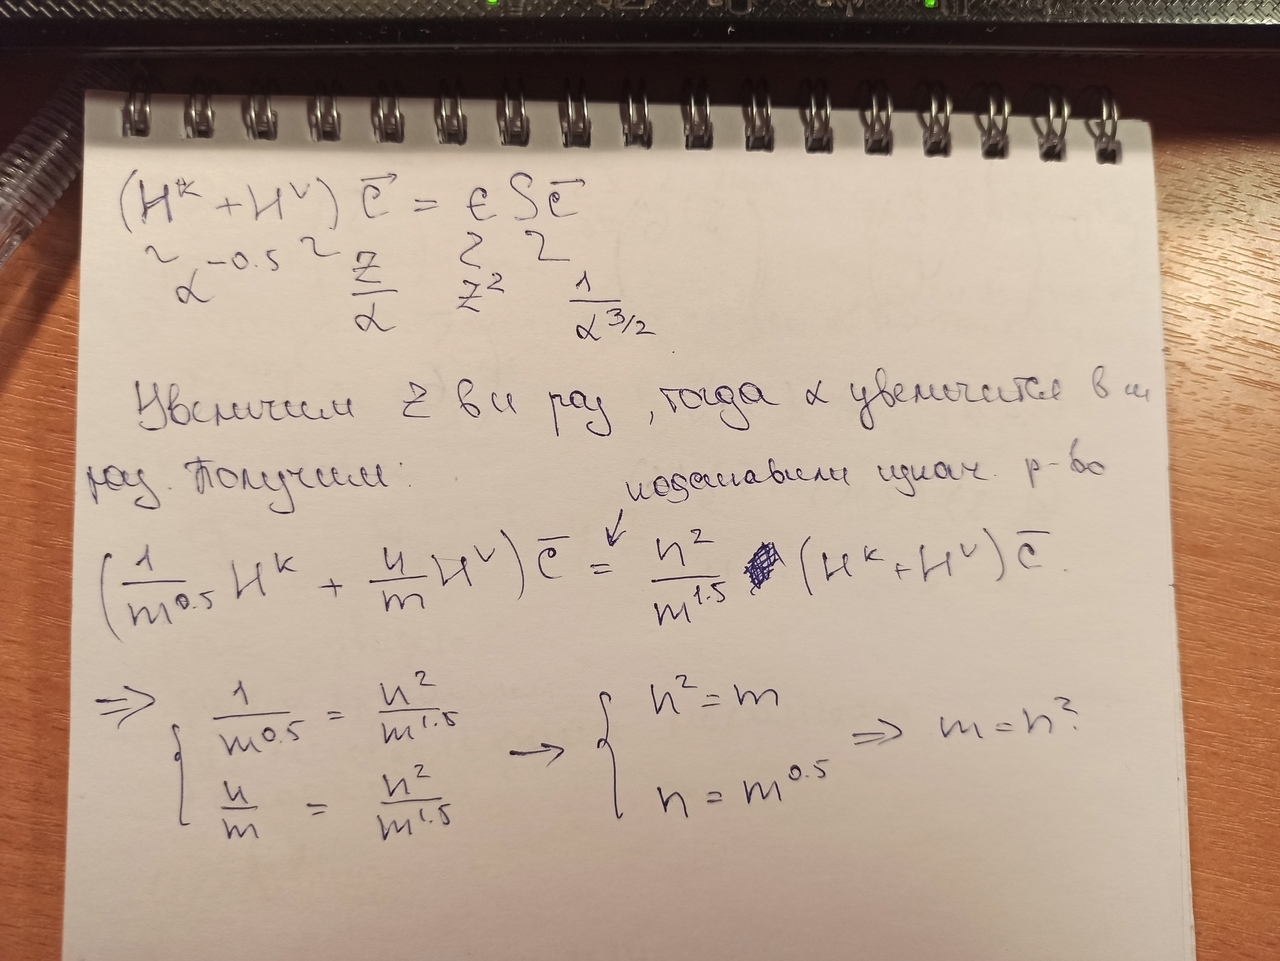

In [135]:
from IPython.display import Image
Image("1.jpg")

А теперь вторым способом:

In [138]:
alpha = [[i*0.001 for j in range(1)] for i in range(1, 5000)]
zeta = 1
e, coeffs = [], []
for i in range(len(alpha)):
    S, H = give_HS(zeta, alpha[i])
    E, Coeffs = sp.eigh(H, S)
    e.append(E)
print('При альфа = ', alpha[e.index(min(e))][0], 'получаем минимум энергии = ', min(e)[0])
zeta = 2
e, coeffs = [], []
for i in range(len(alpha)):
    S, H = give_HS(zeta, alpha[i])
    E, Coeffs = sp.eigh(H, S)
    e.append(E)
print('При альфа = ', alpha[e.index(min(e))][0], 'получаем минимум энергии = ', min(e)[0])
zeta = 3
e, coeffs = [], []
for i in range(len(alpha)):
    S, H = give_HS(zeta, alpha[i])
    E, Coeffs = sp.eigh(H, S)
    e.append(E)
print('При альфа = ', alpha[e.index(min(e))][0], 'получаем минимум энергии = ', min(e)[0])


При альфа =  0.28300000000000003 получаем минимум энергии =  -0.4244131771389239
При альфа =  1.1320000000000001 получаем минимум энергии =  -1.6976527085556956
При альфа =  2.5460000000000003 получаем минимум энергии =  -3.8197186004017096


$z_2/z_1 = 2$, при этом $\alpha_2/\alpha_1 = 4$, 
$z_3/z_1 = 3$, при этом $\alpha_3/\alpha_1 = 9$. Следовательно получаем такой же результат, что и в теории.